In [1]:
import numpy as np
np.random.seed(5243)
from keras import layers
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
import h5py
from sklearn.model_selection import train_test_split
import glob
import os
import numpy as np
import cv2
import csv
import skimage.io
from PIL import Image
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


## Crop Images to 256x256x3

In [2]:
your_path = "/Users/Stephanie/Documents/GitHub/Fall2020-Project3-group_3"
os.chdir(your_path)
path = os.getcwd()

class FaceCropper(object):
    CASCADE_PATH = path + "/lib/haarcascade_frontalface_default.xml"

    def __init__(self):
        print(self.CASCADE_PATH)
        self.face_cascade = cv2.CascadeClassifier(path + "/lib/haarcascade_frontalface_default.xml")
        

    def generate(self, image_path, show_result=False, d = 0):
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(img, 1.1, 5, minSize=(100, 100))
        facecnt = len(faces)
        print("Detected faces: %d" % facecnt)

        if (faces is None):
            return faces
        elif len(faces) > 1:
            eval = []

            # solve the issue when there are multiple detection
            for face in faces:
                x,y,w,h = face
                r = max(w, h) / 2
                size = r*2
                eval.append(size)
            ind = eval.index(max(eval))
            faces = faces.tolist()
            faces = [faces[ind]]

        # zoom a bit more than usual
        for (x, y, w, h) in faces:
            newx, newy,neww,newh = x+d,y+d,w-d,h-d
            r = max(neww, newh) / 2
            centerx = newx + neww / 2
            centery = newy + newh / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)
            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (256, 256))

            return lastimg

        if (show_result):
            for (x, y, w, h) in faces:
                newx, newy, neww, newh = x, y, w - d, h - d
                cv2.rectangle(img, (newx, newy), (newx+neww, newy+newh), (255,0,0), 2)
            cv2.imshow('img', img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

if __name__ == '__main__':
   
    image_path = path + "/data/train_set/images"
    if not os.path.exists(path + '/data/data_1'):
        os.makedirs(path + '/data/data_1')
    destination = path + "/data/data_1"
    if not os.path.isdir(destination):
        os.makedirs(destination)
    if os.path.isdir(image_path):
        file_names = glob.glob(image_path+"/*.jpg")
        faceDetector = FaceCropper()
        for i in range(len(file_names)):
            name = file_names[i]
            print(name)
            result = faceDetector.generate(name)
            if result is None:
                result = faceDetector.generate(file_names[i + 1])
                resname = destination + "/" + os.path.basename(name)
                cv2.imwrite(resname, result)

            else:
                resname = destination + "/" + os.path.basename(name)
                cv2.imwrite(resname, result)

        print("The Face Chopping is done!")

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/lib/haarcascade_frontalface_default.xml
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0071.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2666.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2100.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0717.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1409.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0703.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2114.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2672.jpg
Detected faces: 1
/Users/stephanie/Documents/G

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1541.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2048.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0893.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1555.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1233.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2909.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0878.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2935.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0844.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2317.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2303.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0514.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0272.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2465.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0925.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1385.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2854.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2840.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2513.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0304.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0462.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2275.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1754.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1032.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1026.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0338.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2249.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1769.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0477.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2260.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2506.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0311.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1190.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2499.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1184.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1812.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0507.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0513.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2304.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2462.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0275.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1180.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2489.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1194.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1802.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1793.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2271.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1778.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0466.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0300.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2517.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2503.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0314.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0472.jpg
Detected faces: 1
/

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2844.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2688.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2850.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1381.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0921.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0909.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2878.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1154.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1632.jpg
Detected faces: 1
/Users/stephanie/Do

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0868.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2925.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0854.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1592.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0840.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1586.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0698.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2931.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0115.jpg
Detected faces: 1
/Users/stephanie/Do

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0061.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2676.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2110.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1419.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0707.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0713.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2104.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2662.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0075.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1913.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1085.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2598.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1091.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0600.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2017.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2771.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0166.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1278.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2348.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1127.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0239.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1133.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1655.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2374.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0563.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0205.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2412.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1680.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2389.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1694.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2564.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0373.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0415.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2202.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2216.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0401.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1093.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1905.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1911.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1722.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1044.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2559.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1050.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1736.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0428.jpg
Detected faces: 1
/

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2603.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0014.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2830.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0941.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1487.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0799.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0955.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1493.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2824.jpg
Detected faces: 1
/Users/stephanie/Do

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0809.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2979.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0808.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0820.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1280.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2789.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2951.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2945.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1294.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1486.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0940.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2164.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0773.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0015.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2602.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2616.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0001.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1479.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2204.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1080.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2589.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1094.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1902.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1916.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1241.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2748.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2990.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1693.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0200.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2417.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2371.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0566.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1678.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0572.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2365.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2403.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2432.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1113.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1675.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1661.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2368.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0219.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1107.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2383.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0594.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0634.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0620.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2037.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2989.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2751.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1258.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0146.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1933.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0393.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2155.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2633.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0024.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0030.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2627.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2141.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0756.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1448.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2169.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0622.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1514.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1272.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0178.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1266.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1500.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2009.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0193.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2784.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2342.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1893.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0555.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0233.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2424.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2430.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1139.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0227.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1887.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2385.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1854.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0592.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1713.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1075.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1061.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2568.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0419.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1707.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2019.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2596.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0381.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1921.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1935.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0395.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2582.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1909.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0342.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1328.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0036.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2621.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2147.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0750.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0988.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0744.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2153.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2635.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2741.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2999.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0156.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1248.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2972.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0803.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0817.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2966.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2796.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2378.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1117.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0209.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0786.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1498.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2191.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2185.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0792.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0962.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2257.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1986.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0440.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1038.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0326.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2531.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2525.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0332.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1992.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1011.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1777.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0469.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1763.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1005.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0333.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2524.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2242.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0455.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1417.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1371.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2678.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2693.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0084.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0090.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2687.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2877.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0906.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0872.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0866.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2917.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0867.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2916.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2902.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0873.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0683.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2094.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2686.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0091.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0085.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2692.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1416.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0708.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2679.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1370.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1364.jpg
Detected faces: 1
/

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2251.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0446.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1980.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1758.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0320.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2537.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2286.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0491.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1957.jpg
Detected faces: 1
/Users/stephanie/Do

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1003.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0309.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1017.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1771.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2278.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1836.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0296.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1188.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2481.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1607.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0519.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1161.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2468.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0257.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1149.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2440.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2326.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0531.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0875.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0861.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2910.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2723.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0134.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0652.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2045.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2051.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0646.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2131.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2125.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0732.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0054.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2643.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1362.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1404.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1410.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2119.jpg
Detected faces: 1
/

## Classify images

In [3]:
path = os.getcwd()
read_path = path + "/data/data_1"


save_path = path + '/data/data_2'
if not os.path.exists(save_path):
    os.makedirs(save_path)
import pandas as pd 
data = pd.read_csv(path + "/data/train_set/label.csv") 
file_list = sorted(os.listdir(read_path))
lab = data['label']

for i in range(len(file_list)):
    label = str(lab[i])
    subfolder = os.path.join(save_path, label)
    image = file_list[i]
    if not os.path.exists(subfolder):
        os.makedirs(subfolder)
    img = cv2.imread(os.path.join(read_path, image))
    img = cv2.resize(img, (64, 64))
    cv2.imwrite(os.path.join(subfolder, image), img)

print("Step 3 is done!")

Step 3 is done!


## Save the preproccessed as data.h5 file

In [4]:
path = os.getcwd()
data_path = path + '/data/data_2'

c0_path = os.path.join(data_path, '0')
c1_path = os.path.join(data_path, '1')


# # Creat the list to store the data and label information
data_x = []
data_y = []


datapath = os.path.join(path + '/data/h5','data.h5')
if not os.path.exists(os.path.dirname(datapath)):
    os.makedirs(os.path.dirname(datapath))

# order the file, so the training set will not contain the test set (don't random)
files = os.listdir(c0_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(c0_path,filename))
    data_x.append(I.tolist())
    data_y.append(0)

files = os.listdir(c1_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(c1_path,filename))
    data_x.append(I.tolist())
    data_y.append(1)

print(np.shape(data_x))
print(np.shape(data_y))

datafile = h5py.File(datapath, 'w')
datafile.create_dataset("data_pixel", dtype = 'uint8', data=data_x)
datafile.create_dataset("data_label", dtype = 'int64', data=data_y)
datafile.close()

print("Save data finish!")

(3000, 64, 64, 3)
(3000,)
Save data finish!


## Deal with imbalanced data for all

In [5]:
X_orig = np.array(h5py.File(os.getcwd()+ '/data/h5/data.h5', "r")["data_pixel"][:]) 
Y_orig = np.array(h5py.File(os.getcwd()+ '/data/h5/data.h5', "r")["data_label"][:])


In [6]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_orig[Y_orig==1])))
print("Before OverSampling, counts of label '0': {} \n".format(len(Y_orig[Y_orig==0])))

from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import SVMSMOTE 
smote = SMOTE()
X_orig_smote, Y_orig_smote = smote.fit_sample(X_orig.reshape(X_orig.shape[0], -1), Y_orig.ravel()) #1914 0, 1914 1
X_orig_smote = X_orig_smote.reshape(X_orig_smote.shape[0], 64, 64, 3)

print("After OverSampling, counts of label '1': {}".format(sum(Y_orig_smote[Y_orig_smote==1]))) 
print("After OverSampling, counts of label '0': {}".format(len(Y_orig_smote[Y_orig_smote==0]))) 

Before OverSampling, counts of label '1': 598
Before OverSampling, counts of label '0': 2402 

After OverSampling, counts of label '1': 2402
After OverSampling, counts of label '0': 2402


In [7]:
def load_dataset():
#     path1 = os.getcwd()
#     data_path1 = path1 + '/data/h5/data.h5'
#     train_dataset = h5py.File(data_path1, "r")
#     X_orig = np.array(train_dataset["data_pixel"][:]) # your train set features
#     Y_orig = np.array(train_dataset["data_label"][:]) # your train set labels
    X_train, X_test, y_train, y_test = train_test_split(X_orig_smote, Y_orig_smote, test_size=0.2, random_state=5243)
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test

In [8]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [9]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset() #2400 train data, 600 test data

In [10]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 2).T
Y_test = convert_to_one_hot(Y_test_orig, 2).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 3843
number of test examples = 961
X_train shape: (3843, 64, 64, 3)
Y_train shape: (3843, 2)
X_test shape: (961, 64, 64, 3)
Y_test shape: (961, 2)


In [11]:
# """ResNet50 model for Keras.
# # Reference:
# - [Deep Residual Learning for Image Recognition](
#     https://arxiv.org/abs/1512.03385) (CVPR 2016 Best Paper Award)
# Adapted from code contributed by BigMoyan.
# """
# #from __future__ import absolute_import
# #from __future__ import division
# #from __future__ import print_function

# #import os
# #import warnings


# #import imagenet_utils
# #from keras.applications.imagenet_utils import decode_predictions
# #from keras.applications.imagenet_utils import _obtain_input_shape


# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

# import os
# import warnings


# from keras.applications import imagenet_utils
# from keras.applications.imagenet_utils import decode_predictions
# from keras_applications.imagenet_utils import _obtain_input_shape

# preprocess_input = imagenet_utils.preprocess_input

# WEIGHTS_PATH = ('https://github.com/fchollet/deep-learning-models/'
#                 'releases/download/v0.2/'
#                 'resnet50_weights_tf_dim_ordering_tf_kernels.h5')
# WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/'
#                        'releases/download/v0.2/'
#                        'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

# backend = None
# layers = None
# models = None
# keras_utils = None


# def get_submodules_from_kwargs(kwargs):
#     backend = kwargs.get('backend', _KERAS_BACKEND)
#     layers = kwargs.get('layers', _KERAS_LAYERS)
#     models = kwargs.get('models', _KERAS_MODELS)
#     utils = kwargs.get('utils', _KERAS_UTILS)
#     for key in kwargs.keys():
#         if key not in ['backend', 'layers', 'models', 'utils']:
#             raise TypeError('Invalid keyword argument: %s', key)
#     return backend, layers, models, utils


# def identity_block(input_tensor, kernel_size, filters, stage, block):
#     """The identity block is the block that has no conv layer at shortcut.
#     # Arguments
#         input_tensor: input tensor
#         kernel_size: default 3, the kernel size of
#             middle conv layer at main path
#         filters: list of integers, the filters of 3 conv layer at main path
#         stage: integer, current stage label, used for generating layer names
#         block: 'a','b'..., current block label, used for generating layer names
#     # Returns
#         Output tensor for the block.
#     """
#     filters1, filters2, filters3 = filters
#     if backend.image_data_format() == 'channels_last':
#         bn_axis = 3
#     else:
#         bn_axis = 1
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     x = layers.Conv2D(filters1, (1, 1),
#                       kernel_initializer='he_normal',
#                       name=conv_name_base + '2a')(input_tensor)
#     x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
#     x = layers.Activation('relu')(x)

#     x = layers.Conv2D(filters2, kernel_size,
#                       padding='same',
#                       kernel_initializer='he_normal',
#                       name=conv_name_base + '2b')(x)
#     x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
#     x = layers.Activation('relu')(x)

#     x = layers.Conv2D(filters3, (1, 1),
#                       kernel_initializer='he_normal',
#                       name=conv_name_base + '2c')(x)
#     x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

#     x = layers.add([x, input_tensor])
#     x = layers.Activation('relu')(x)
#     return x

In [12]:
# def conv_block(input_tensor,
#                kernel_size,
#                filters,
#                stage,
#                block,
#                strides=(2, 2)):
#     """A block that has a conv layer at shortcut.
#     # Arguments
#         input_tensor: input tensor
#         kernel_size: default 3, the kernel size of
#             middle conv layer at main path
#         filters: list of integers, the filters of 3 conv layer at main path
#         stage: integer, current stage label, used for generating layer names
#         block: 'a','b'..., current block label, used for generating layer names
#         strides: Strides for the first conv layer in the block.
#     # Returns
#         Output tensor for the block.
#     Note that from stage 3,
#     the first conv layer at main path is with strides=(2, 2)
#     And the shortcut should have strides=(2, 2) as well
#     """
#     filters1, filters2, filters3 = filters
#     if backend.image_data_format() == 'channels_last':
#         bn_axis = 3
#     else:
#         bn_axis = 1
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     x = layers.Conv2D(filters1, (1, 1), strides=strides,
#                       kernel_initializer='he_normal',
#                       name=conv_name_base + '2a')(input_tensor)
#     x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
#     x = layers.Activation('relu')(x)

#     x = layers.Conv2D(filters2, kernel_size, padding='same',
#                       kernel_initializer='he_normal',
#                       name=conv_name_base + '2b')(x)
#     x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
#     x = layers.Activation('relu')(x)

#     x = layers.Conv2D(filters3, (1, 1),
#                       kernel_initializer='he_normal',
#                       name=conv_name_base + '2c')(x)
#     x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

#     shortcut = layers.Conv2D(filters3, (1, 1), strides=strides,
#                              kernel_initializer='he_normal',
#                              name=conv_name_base + '1')(input_tensor)
#     shortcut = layers.BatchNormalization(
#         axis=bn_axis, name=bn_name_base + '1')(shortcut)

#     x = layers.add([x, shortcut])
#     x = layers.Activation('relu')(x)
#     return x



In [13]:
# def ResNet50(include_top=True,
#              weights='imagenet',
#              input_tensor=None,
#              input_shape=None,
#              pooling=None,
#              classes=1000,
#              **kwargs):
#     """Instantiates the ResNet50 architecture.
#     Optionally loads weights pre-trained on ImageNet.
#     Note that the data format convention used by the model is
#     the one specified in your Keras config at `~/.keras/keras.json`.
#     # Arguments
#         include_top: whether to include the fully-connected
#             layer at the top of the network.
#         weights: one of `None` (random initialization),
#               'imagenet' (pre-training on ImageNet),
#               or the path to the weights file to be loaded.
#         input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
#             to use as image input for the model.
#         input_shape: optional shape tuple, only to be specified
#             if `include_top` is False (otherwise the input shape
#             has to be `(224, 224, 3)` (with `channels_last` data format)
#             or `(3, 224, 224)` (with `channels_first` data format).
#             It should have exactly 3 inputs channels,
#             and width and height should be no smaller than 32.
#             E.g. `(200, 200, 3)` would be one valid value.
#         pooling: Optional pooling mode for feature extraction
#             when `include_top` is `False`.
#             - `None` means that the output of the model will be
#                 the 4D tensor output of the
#                 last convolutional block.
#             - `avg` means that global average pooling
#                 will be applied to the output of the
#                 last convolutional block, and thus
#                 the output of the model will be a 2D tensor.
#             - `max` means that global max pooling will
#                 be applied.
#         classes: optional number of classes to classify images
#             into, only to be specified if `include_top` is True, and
#             if no `weights` argument is specified.
#     # Returns
#         A Keras model instance.
#     # Raises
#         ValueError: in case of invalid argument for `weights`,
#             or invalid input shape.
#     """
#     global backend, layers, models, keras_utils
#     backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

#     if not (weights in {'imagenet', None} or os.path.exists(weights)):
#         raise ValueError('The `weights` argument should be either '
#                          '`None` (random initialization), `imagenet` '
#                          '(pre-training on ImageNet), '
#                          'or the path to the weights file to be loaded.')

#     if weights == 'imagenet' and include_top and classes != 1000:
#         raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
#                          ' as true, `classes` should be 1000')

#     # Determine proper input shape
#     input_shape = _obtain_input_shape(input_shape,
#                                       default_size=224,
#                                       min_size=32,
#                                       data_format=backend.image_data_format(),
#                                       require_flatten=include_top,
#                                       weights=weights)

#     if input_tensor is None:
#         img_input = layers.Input(shape=input_shape)
#     else:
#         if not backend.is_keras_tensor(input_tensor):
#             img_input = layers.Input(tensor=input_tensor, shape=input_shape)
#         else:
#             img_input = input_tensor
#     if backend.image_data_format() == 'channels_last':
#         bn_axis = 3
#     else:
#         bn_axis = 1

#     x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
#     x = layers.Conv2D(64, (7, 7),
#                       strides=(2, 2),
#                       padding='valid',
#                       kernel_initializer='he_normal',
#                       name='conv1')(x)
#     x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
#     x = layers.Activation('relu')(x)
#     x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
#     x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

#     x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
#     x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
#     x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

#     x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
#     x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
#     x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
#     x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

#     x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
#     x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
#     x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
#     x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
#     x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
#     x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

#     x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
#     x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
#     x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

#     if include_top:
#         x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
#         x = layers.Dense(classes, activation='softmax', name='fc1000')(x)
#     else:
#         if pooling == 'avg':
#             x = layers.GlobalAveragePooling2D()(x)
#         elif pooling == 'max':
#             x = layers.GlobalMaxPooling2D()(x)
#         else:
#             warnings.warn('The output shape of `ResNet50(include_top=False)` '
#                           'has been changed since Keras 2.2.0.')

#     # Ensure that the model takes into account
#     # any potential predecessors of `input_tensor`.
#     if input_tensor is not None:
#         inputs = keras_utils.get_source_inputs(input_tensor)
#     else:
#         inputs = img_input
#     # Create model.
#     model = models.Model(inputs, x, name='resnet50')

#     # Load weights.
#     if weights == 'imagenet':
#         if include_top:
#             weights_path = keras_utils.get_file(
#                 'resnet50_weights_tf_dim_ordering_tf_kernels.h5',
#                 WEIGHTS_PATH,
#                 cache_subdir='models',
#                 md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
#         else:
#             weights_path = keras_utils.get_file(
#                 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
#                 WEIGHTS_PATH_NO_TOP,
#                 cache_subdir='models',
#                 md5_hash='a268eb855778b3df3c7506639542a6af')
#         model.load_weights(weights_path)
#         if backend.backend() == 'theano':
#             keras_utils.convert_all_kernels_in_model(model)
#     elif weights is not None:
#         model.load_weights(weights)

#     return model

In [14]:
def identity_block(X, f, filters, stage, block):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value.
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
      
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
       
    return X

In [15]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path 
    X = Conv2D(F2, (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [16]:
def ResNet50(input_shape = (64, 64, 3), classes = 2):
    """
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), name = 'avg_pool')(X)
    
    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
   
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [17]:
#from keras import backend as K
#K.set_learning_phase(1)
model = ResNet50(input_shape = (64, 64, 3), classes = 2)

model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy']) 

In [18]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20
61/61 [==============================] - 93s 2s/step - loss: 0.6419 - accuracy: 0.7533
Epoch 2/20
61/61 [==============================] - 621s 10s/step - loss: 0.4555 - accuracy: 0.7934
Epoch 3/20
61/61 [==============================] - 93s 2s/step - loss: 0.3489 - accuracy: 0.8410
Epoch 4/20
61/61 [==============================] - 139s 2s/step - loss: 0.3285 - accuracy: 0.8483
Epoch 5/20
61/61 [==============================] - 93s 2s/step - loss: 0.3965 - accuracy: 0.8093
Epoch 6/20
61/61 [==============================] - 401s 7s/step - loss: 0.3879 - accuracy: 0.8319
Epoch 7/20
61/61 [==============================] - 94s 2s/step - loss: 0.2776 - accuracy: 0.8821
Epoch 8/20
61/61 [==============================] - 150s 2s/step - loss: 0.2370 - accuracy: 0.8998
Epoch 9/20
61/61 [==============================] - 96s 2s/step - loss: 0.5022 - accuracy: 0.7590
Epoch 10/20
61/61 [==============================] - 98s 2s/step - loss: 0.4114 - accuracy: 0.8124
Epoch 11/20
61

In [19]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

31/31 [==============================] - 4s 129ms/step - loss: 0.5517 - accuracy: 0.7596
Loss = 0.5516830086708069
Test Accuracy = 0.7596253752708435


## ROC curve with AUC

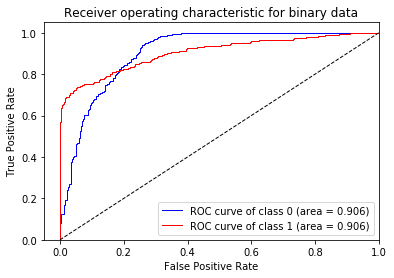

In [20]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_curve, auc
from numpy.random import seed
seed(5243)
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.predict(X_test)
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red'])

for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for binary data')
plt.legend(loc="lower right")
plt.show()

In [21]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [22]:
# plot_model(model, to_file='model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))